In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim



In [3]:
df = pd.read_csv('./Dataset/pillow_features.csv')
df = df[df['Sales_volume'] != 0]
df = df.dropna()

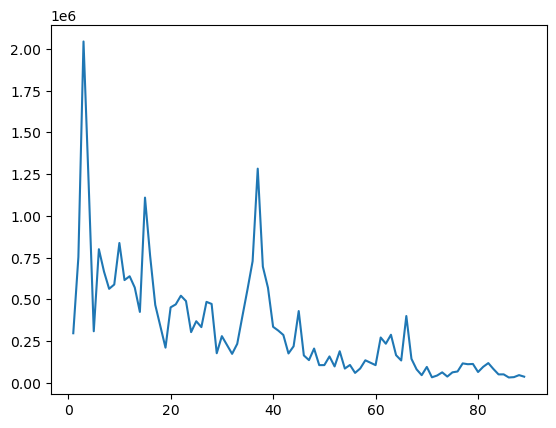

In [5]:
plt.plot(df['Promotion_expense'])

寻找是否存在线性关系

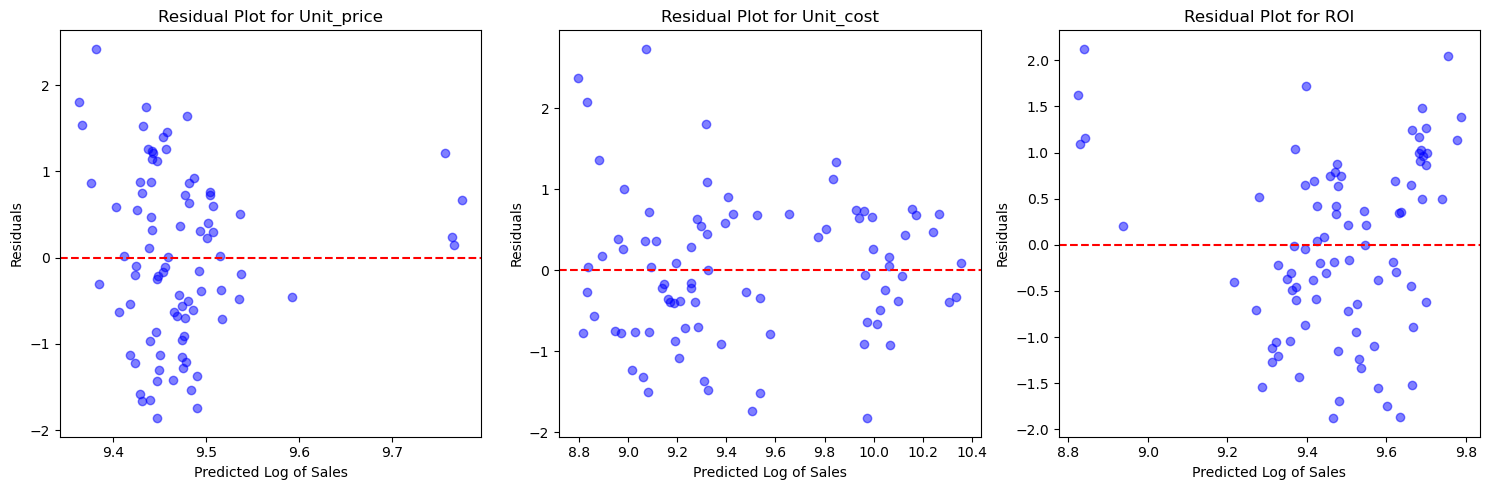

In [4]:
from sklearn.linear_model import LinearRegression

# 假设你的DataFrame为df，特征包括['成本', '售价', 'roi']，目标为'sales_target'
features = ['Unit_price', 'Unit_cost', 'ROI']
target = 'Target'

# 创建图形并设置大小
plt.figure(figsize=(15, 5))

# 检查目标列中是否有非正数值，避免在取对数时出现错误
df[target] = df[target].clip(lower=1)

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    
    # 对目标变量取对数
    log_target = np.log(df[target])
    
    # 拟合线性回归
    X = df[feature].values.reshape(-1, 1)
    y = log_target
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # 计算残差
    residuals = y - y_pred

    # 绘制残差图
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')  # 添加 y=0 参考线

    # 图表标题和标签
    plt.title(f'Residual Plot for {feature}')
    plt.xlabel('Predicted Log of Sales')
    plt.ylabel('Residuals')

# 显示图像
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\1273565655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version2['Month'] = pd.date_range(start='2018-02', end = '2019-02',  freq='M').strftime('%Y-%m')


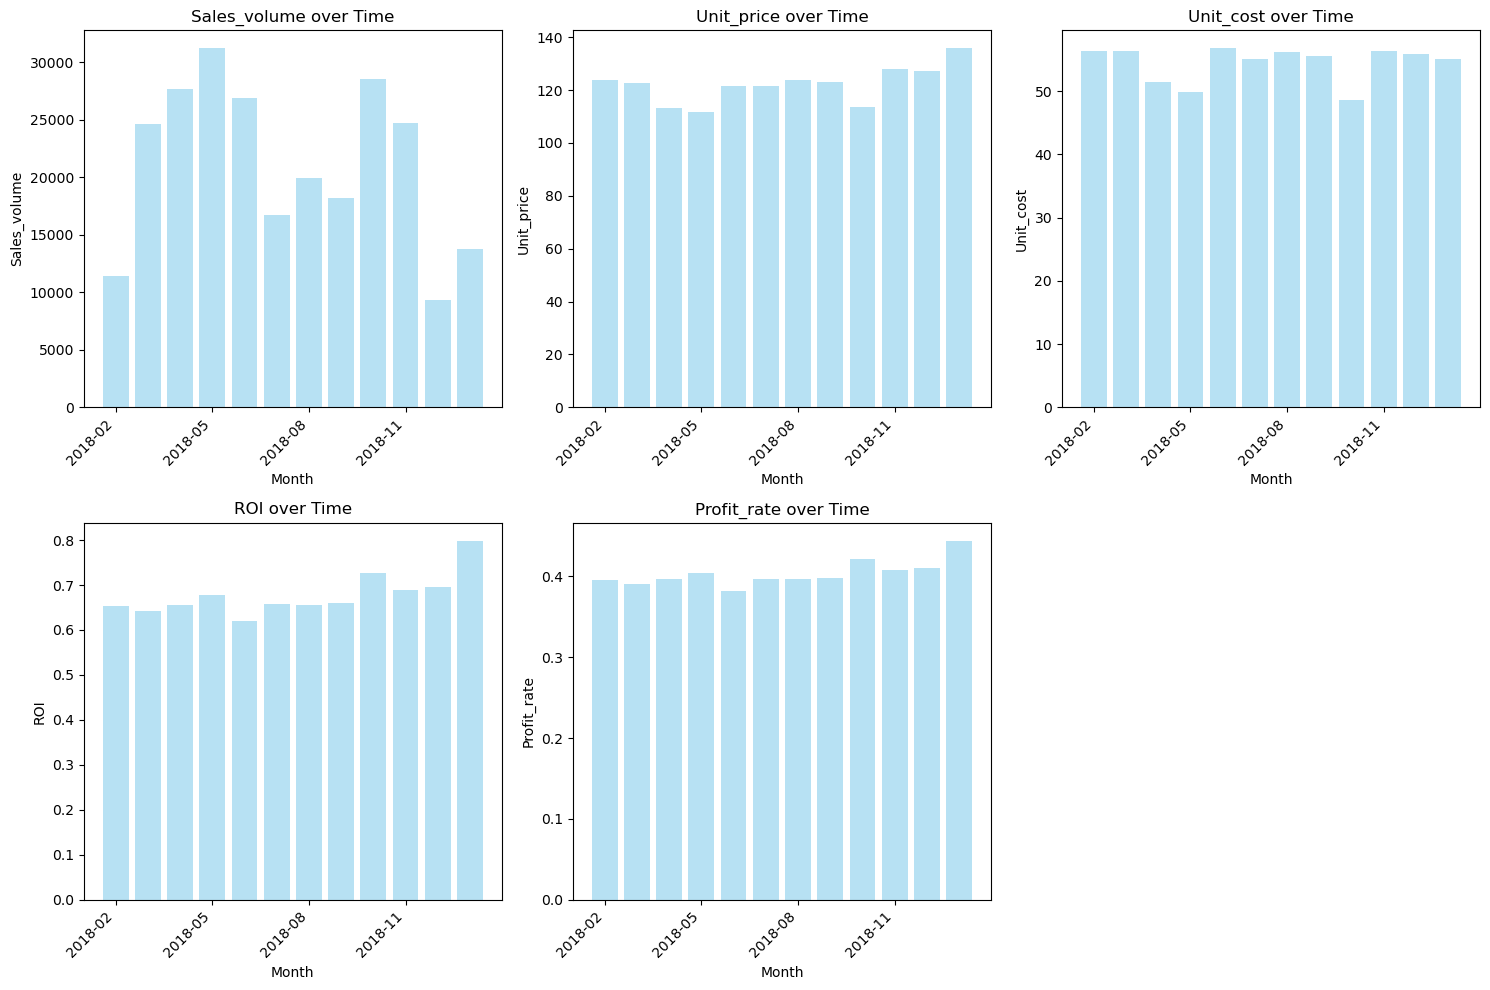

In [6]:
version2 = df[df['Version'] == 2]
version2['Month'] = pd.date_range(start='2018-02', end = '2019-02',  freq='M').strftime('%Y-%m')

dates = version2['Month'].values
# The columns of interest for the user
columns_of_interest = ['Sales_volume','Unit_price','Unit_cost', 'ROI','Profit_rate']

# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(columns_of_interest):
    axes[idx].bar(dates, version2[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    # 每三个月显示一个日期
    xticks_positions = range(0, len(dates), 3)
    xticks_labels = [dates[i] for i in xticks_positions]
    axes[idx].set_xticks(xticks_positions)
    axes[idx].set_xticklabels(xticks_labels, rotation=45, ha='right')
    
    

# Remove the extra subplot (since we only have 5 features but 6 subplots)
fig.delaxes(axes[-1])

# Final adjustments to layout
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5352\161734812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version3['Month'] = pd.date_range(start='2019-02', end = '2021-04',  freq='M').strftime('%Y-%m')


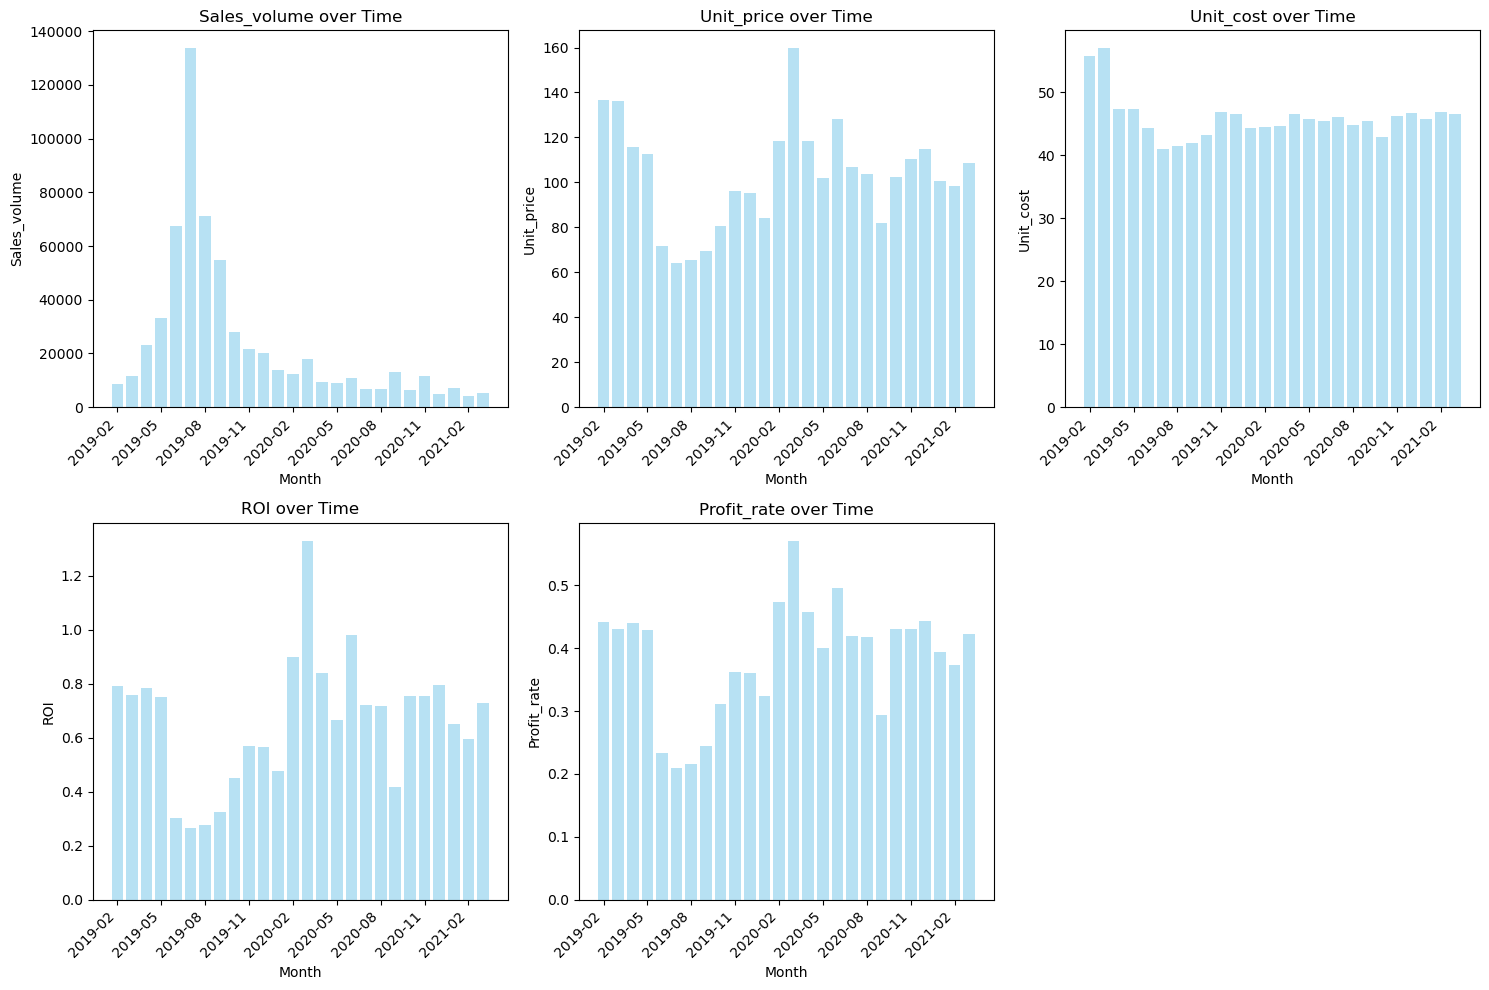

In [7]:
version3 = df[df['Version'] == 3]
version3['Month'] = pd.date_range(start='2019-02', end = '2021-04',  freq='M').strftime('%Y-%m')

dates = version3['Month'].values
# The columns of interest for the user
columns_of_interest = ['Sales_volume','Unit_price','Unit_cost', 'ROI','Profit_rate']

# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(columns_of_interest):
    axes[idx].bar(dates, version3[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    # 每三个月显示一个日期
    xticks_positions = range(0, len(dates), 3)
    xticks_labels = [dates[i] for i in xticks_positions]
    axes[idx].set_xticks(xticks_positions)
    axes[idx].set_xticklabels(xticks_labels, rotation=45, ha='right')
    
    

# Remove the extra subplot (since we only have 5 features but 6 subplots)
fig.delaxes(axes[-1])

# Final adjustments to layout
plt.tight_layout()
plt.show()


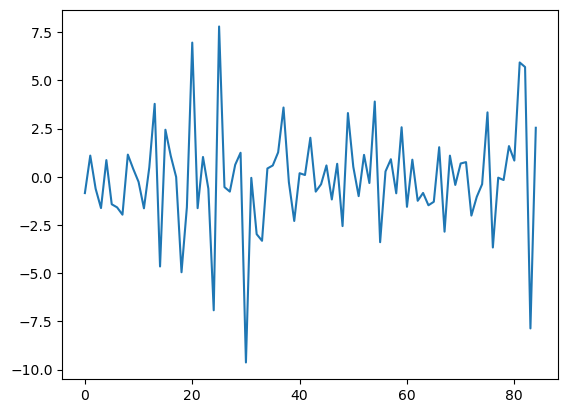

In [8]:
plt.plot(np.diff(df['Unit_cost'].values))

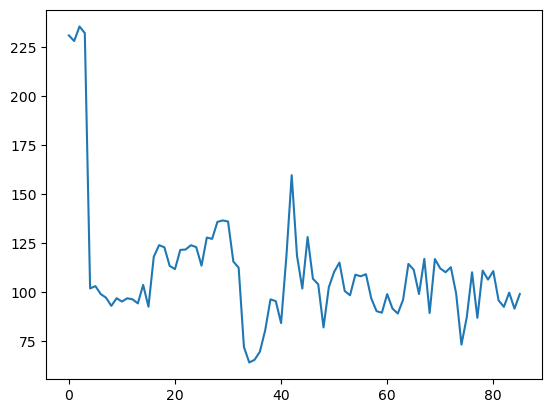

In [9]:
plt.plot(df['Unit_price'].values)

In [10]:
cor_features = ['Unit_price', 'Unit_cost', 'ROI', 'Profit_rate']
df_cor_features = df[cor_features]
# 使用 pd.date_range() 创建从 2016 年 9 月开始，以月份为频率的日期索引
date_index = pd.date_range(start='2016-09', periods=len(df_cor_features), freq='M')

# 将该日期索引赋值给 DataFrame 的 index
df_cor_features.index = date_index

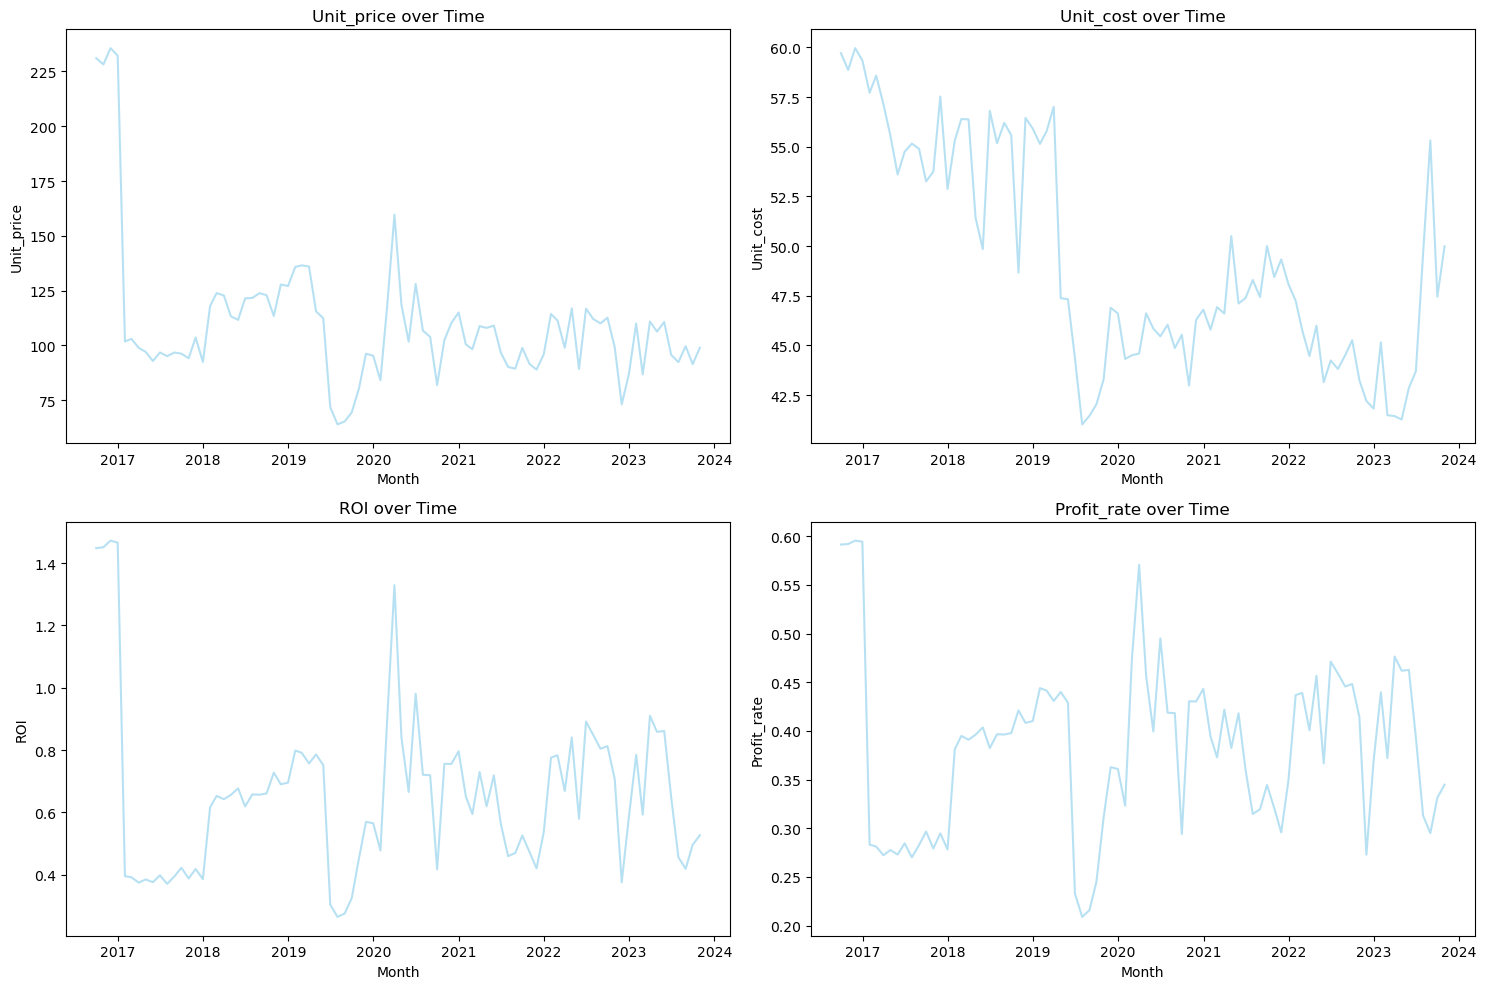

In [11]:
# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(df_cor_features.columns):
    axes[idx].plot(df_cor_features[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    

# Final adjustments to layout
plt.tight_layout()
plt.show()

In [12]:
 # 去掉前四个值作为离群点
df_cor_features = df_cor_features[4:]
df_cor_features

,Unit_price,Unit_cost,ROI,Profit_rate
2017-01-31,101.821270,57.716305,0.395013,0.283161
2017-02-28,103.004670,58.578907,0.391398,0.281299
2017-03-31,98.940003,57.152753,0.374286,0.272349
2017-04-30,97.088720,55.565122,0.384442,0.277687
2017-05-31,92.903957,53.599067,0.375649,0.273070
...,...,...,...,...
2023-06-30,95.717707,43.700867,0.648642,0.393440
2023-07-31,92.408766,49.626801,0.455529,0.312964
2023-08-31,99.675908,55.315655,0.418530,0.295045
2023-09-30,91.487771,47.451899,0.495508,0.331331


尝试分组别进行特征训练

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim

df = pd.read_csv('./Dataset/pillow_features.csv')
df = df[df['Sales_volume'] != 0]
df = df[4:]
df = df.dropna()


In [2]:
features = ['Unit_price', 'Unit_cost', 'ROI', 'Profit_rate']
df_features = df[features]
correlation_matrix = df_features.corr()
correlation_matrix

,Unit_price,Unit_cost,ROI,Profit_rate
Unit_price,1.000000,0.375614,0.792061,0.792760
Unit_cost,0.375614,1.000000,-0.260665,-0.232270
ROI,0.792061,-0.260665,1.000000,0.987663
Profit_rate,0.792760,-0.232270,0.987663,1.000000


In [3]:
def create_dataset(data, time_step=1):
    dataset = []
    version_groups = data.groupby('Version')
    for version, group in version_groups:
        data = group[features].values
        X = torch.tensor(data[:-time_step], dtype= torch.float32)
        y = torch.tensor(data[time_step:], dtype = torch.float32)
        dataset.append((X, y))
    return dataset
# 假设 df 是你的数据框，其中包含 ['cost', 'price', 'ROI', 'interest_rate']

# 全局特征归一化处理
scaler_X = MinMaxScaler()
X_all = scaler_X.fit_transform(df_features.values)


# 创建一个新的 DataFrame 副本来避免修改原始 DataFrame
df_features_normalized = df[features].copy()
df_features_normalized.loc[:, features] = X_all

df_features_normalized['Version'] =df['Version']

dataloaders = create_dataset(df_features_normalized)


In [4]:
# 2. 定义 LSTM 模型
class FeaturesLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeaturesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        lstm_out, hidden = self.lstm(x, hidden)
        predictions = self.fc(lstm_out)
        return predictions, hidden

# 参数设定
input_size = 4  # 输入的四个特征
hidden_size = 64  # 隐藏层神经元数量
output_size = 4  # 输出的四个特征
num_epochs = 100
learning_rate = 0.001

model = FeaturesLSTM(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  # 损失函数
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


num_epochs = 512  # 总的训练轮数

for epoch in range(num_epochs):
    indexs = np.random.permutation(len(dataloaders))
    for index in indexs:
        dataset = dataloaders[index]
        X = dataset[0]
        y = dataset[1]
        hidden = (torch.zeros(1, 1, hidden_size),
                        torch.zeros(1, 1, hidden_size))
        loss = 0.0
        for i in range(len(X)):
            x_input = X[i].view(1, 1, -1)  # 输入数据
            y_target = y[i].view(1, 1, -1)  # 
            y_pred, hidden = model(x_input, hidden)
            loss = loss + criterion(y_pred.view(-1), y_target.view(-1))
        loss = loss / X.shape[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [10/512], Loss: 0.0388
Epoch [20/512], Loss: 0.0504
Epoch [30/512], Loss: 0.0354
Epoch [40/512], Loss: 0.0311
Epoch [50/512], Loss: 0.0271
Epoch [60/512], Loss: 0.0205
Epoch [70/512], Loss: 0.0228
Epoch [80/512], Loss: 0.0365
Epoch [90/512], Loss: 0.0335
Epoch [100/512], Loss: 0.0209
Epoch [110/512], Loss: 0.0140
Epoch [120/512], Loss: 0.0118
Epoch [130/512], Loss: 0.0115
Epoch [140/512], Loss: 0.0113
Epoch [150/512], Loss: 0.0259
Epoch [160/512], Loss: 0.0254
Epoch [170/512], Loss: 0.0209
Epoch [180/512], Loss: 0.0199
Epoch [190/512], Loss: 0.0182
Epoch [200/512], Loss: 0.0235
Epoch [210/512], Loss: 0.0106
Epoch [220/512], Loss: 0.0080
Epoch [230/512], Loss: 0.0075
Epoch [240/512], Loss: 0.0159
Epoch [250/512], Loss: 0.0171
Epoch [260/512], Loss: 0.0146
Epoch [270/512], Loss: 0.0150
Epoch [280/512], Loss: 0.0204
Epoch [290/512], Loss: 0.0146
Epoch [300/512], Loss: 0.0208
Epoch [310/512], Loss: 0.0133
Epoch [320/512], Loss: 0.0090
Epoch [330/512], Loss: 0.0053
Epoch [340/512], Lo

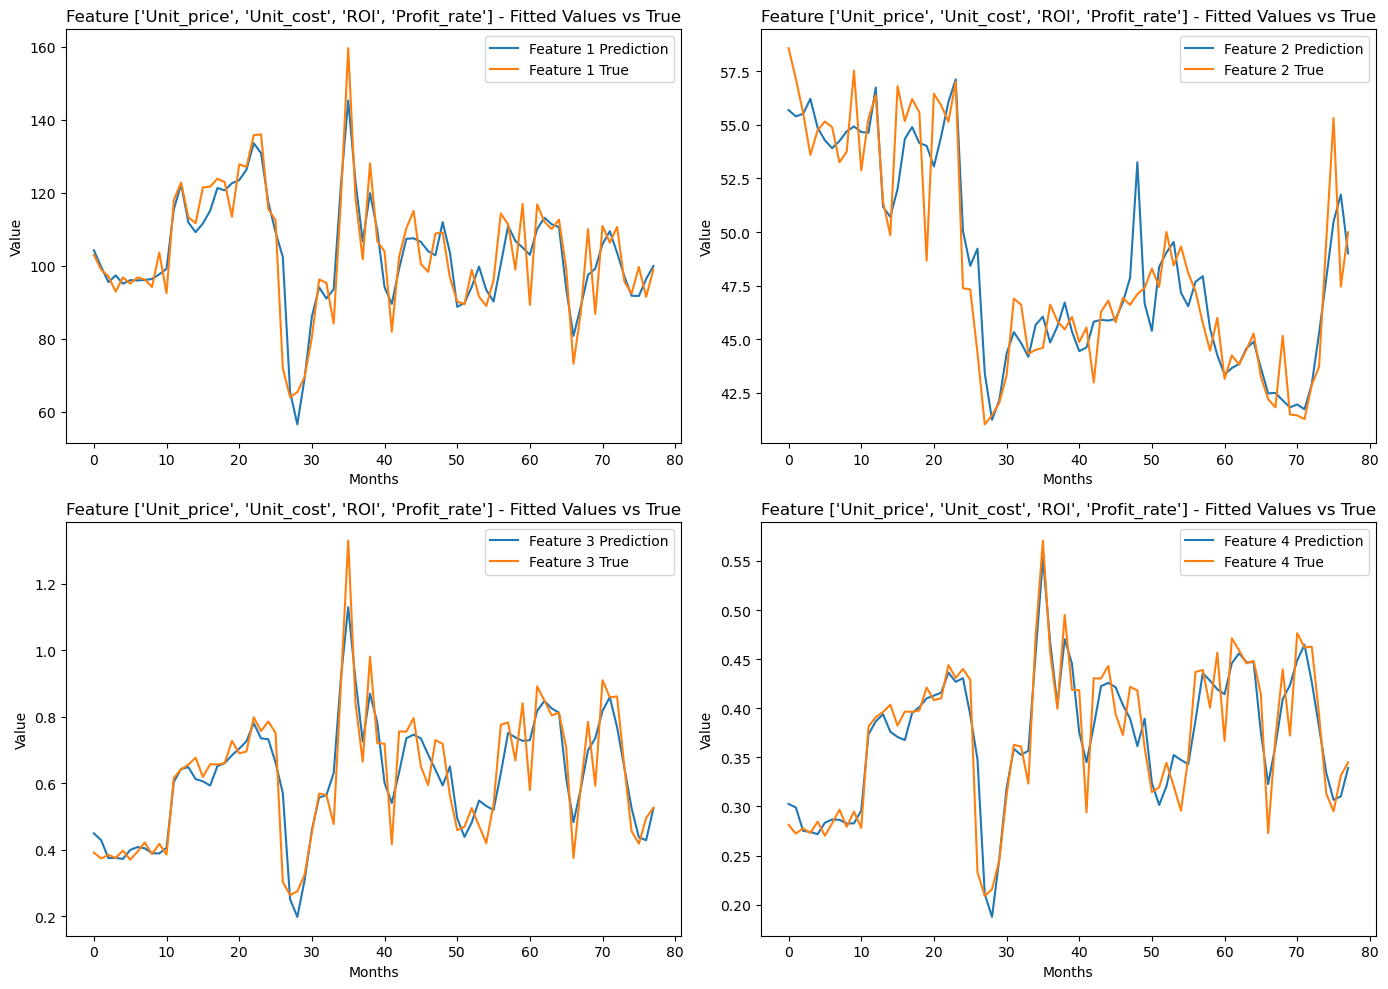

In [5]:
# 查看拟合效果
targets = []
fitted_values = []

model.eval()
with torch.no_grad():
    for dataset in dataloaders:
        X = dataset[0]
        y = dataset[1]
        targets.append(y.numpy())
        hidden = (torch.zeros(1, 1, hidden_size),
                torch.zeros(1, 1, hidden_size))
          # 将模型设置为评估模式
        for i in range(len(X)):
            x_input = X[i].view(1, 1, -1)  # 输入数据
            y_pred, hidden = model(x_input, hidden)
            fitted_values.append(y_pred.view(1, -1).numpy())
targets = np.concatenate(targets, axis=0)
fitted_values = np.concatenate(fitted_values, axis=0)

# 反归一化预测数据和实际数据
targets_rescaled = scaler_X.inverse_transform(targets) 
fitted_values_rescaled = scaler_X.inverse_transform(fitted_values)
           
    
    
# 创建图表
plt.figure(figsize=(14, 10))

# 绘制每个特征的图
for i in range(len(features)):
    feature = features
    plt.subplot(2, 2, i+1)
    plt.plot(fitted_values_rescaled[:, i], label=f'Feature {i+1} Prediction')
    plt.plot(targets_rescaled[:, i], label=f'Feature {i+1} True')
    plt.title(f'Feature {feature} - Fitted Values vs True')
    plt.xlabel('Months')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [27]:
model.eval()
hidden = (torch.zeros(1, 1, hidden_size),
                      torch.zeros(1, 1, hidden_size))
with torch.no_grad():
    # 使用最后一次训练后的 hidden state 预测测试集
    predictions = []
    input_data = scaler_X.transform(np.array([[130	,80	,0.6, 0.35]]))
    input_data = torch.tensor(input_data, dtype = torch.float32).view(1,1,-1)  # 测试集的初始输入 (1, time_step, features)

    for i in range(6):
        pred, hidden = model(input_data, hidden)
        predictions.append(pred.numpy())
        input_data = pred.view(1,1,-1)  # 使用预测结果作为下一个时间步的输入

predictions = np.array(predictions).reshape(-1, output_size)

# 反归一化预测数据和实际数据
predictions_rescaled = scaler_X.inverse_transform(predictions)

predictions_rescaled

array([[136.95705   ,  67.83411   ,   0.58123577,   0.37483034],
       [128.80618   ,  62.183113  ,   0.62670416,   0.38950226],
       [123.16634   ,  59.632904  ,   0.58666116,   0.36537126],
       [125.666306  ,  59.957806  ,   0.5828498 ,   0.35986665],
       [129.71951   ,  59.78557   ,   0.6225502 ,   0.37544647],
       [134.6125    ,  59.43939   ,   0.68403727,   0.3999276 ]],
      dtype=float32)

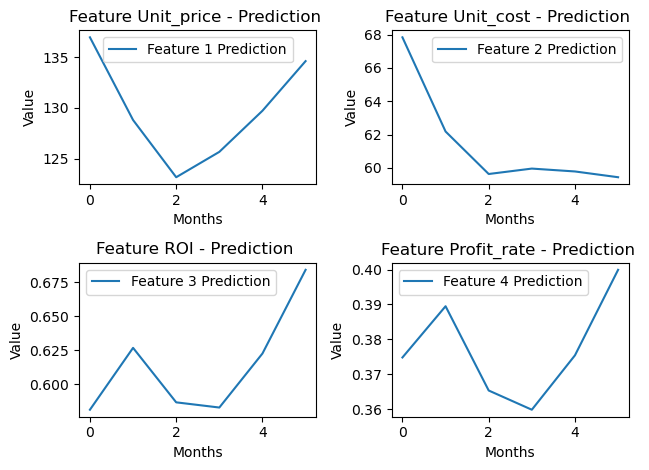

In [28]:
# 绘制每个特征的图
for i in range(4):
    feature = features[i]
    plt.subplot(2, 2, i+1)
    plt.plot(predictions_rescaled[:, i], label=f'Feature {i+1} Prediction')
    #plt.plot(y_test_rescaled[:, i], label=f'Feature {i+1} True')
    plt.title(f'Feature {feature} - Prediction ')
    plt.xlabel('Months')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
torch.save(model.state_dict(), 'pillow_features_model.pth')
import joblib
# 保存 scaler_X 到文件
joblib.dump(scaler_X, 'features_scaler.pkl')



['feature_scaler.pkl']

In [24]:
df['Unit_price'].describe()

count     82.000000
mean     104.251114
std       16.786344
min       64.001229
25%       95.176239
50%      102.726325
75%      114.125015
max      159.657110
Name: Unit_price, dtype: float64

In [3]:
import numpy as np
a = np.random.randn(4,7)
a[:, 0] = list(range(4))
a

array([[ 0.        , -0.63750781,  1.05161501,  1.27573655, -0.43646314,
         0.1829238 , -2.02387023],
       [ 1.        ,  1.74692039,  0.20269673, -0.81158833, -0.03134671,
         1.198197  , -0.6390908 ],
       [ 2.        , -1.0470983 , -0.47586613, -1.41860269, -0.0139517 ,
        -0.19044184, -0.43527263],
       [ 3.        ,  0.53980838, -0.36777085, -1.41953706,  0.28397457,
         0.92607985, -1.4096677 ]])